In [1]:
import random
import matplotlib.pyplot as plt
from scipy.stats import qmc
import time
import numpy as np

In [10]:
def monte_carlo_pi(num_samples):
    inside_circle = 0
    pi_values = []
    points_inside_x = []
    points_inside_y = []
    points_outside_x = []
    points_outside_y = []

    for i in range(1, num_samples+1):
        x = random.uniform(0, 1)
        y = random.uniform(0, 1)

        distance = x**2 + y**2

        if distance <= 1:
            inside_circle += 1
            points_inside_x.append(x)
            points_inside_y.append(y)
        else:
            points_outside_x.append(x)
            points_outside_y.append(y)
            
        pi_estimate = (inside_circle / i) * 4
        pi_values.append(pi_estimate)


    estimated_pi = (inside_circle / num_samples) * 4

    return pi_values, [points_inside_x, points_inside_y], [points_outside_x, points_outside_y]

In [3]:
def monte_carlo_pi_halton(num_samples):
    sampler = qmc.Halton(d=2, scramble=False)
    sample = sampler.random(n=num_samples)
    inside_circle = 0
    pi_values = []
    points_inside_x = []
    points_inside_y = []
    points_outside_x = []
    points_outside_y = []

    for i,element in enumerate(sample):
        x=element[0]
        y=element[1]
        distance = x**2 + y**2

        if distance <= 1:
            inside_circle += 1
            points_inside_x.append(x)
            points_inside_y.append(y)
        else:
            points_outside_x.append(x)
            points_outside_y.append(y)
            
            
        pi_estimate = (inside_circle /(1+i)) * 4
        pi_values.append(pi_estimate)


    estimated_pi = (inside_circle / num_samples+1) * 4

    return pi_values, [points_inside_x, points_inside_y], [points_outside_x, points_outside_y]

In [26]:
def congruencia_lineal(n, a, b, c):
    seed = int(time.time())
    lista3 = np.empty(n)
    for i in range(n):
        xn = (a * seed + b) % c
        seed = xn
        lista3[i] = xn
    lista4 = lista3 / np.max(lista3)
    return lista4

In [31]:
def monte_carlo_pi_cl(num_samples, a, b, c):
    inicio = time.time()
    inside_circle = 0
    pi_values = np.zeros(num_samples)
    points_inside_x = []
    points_inside_y = []

    l = congruencia_lineal(num_samples * 2, a, b, c)
    al = l[:num_samples]
    bl = l[num_samples:]

    x_values = al[1:][::-1]
    y_values = bl[:-1]

    distances = x_values**2 + y_values**2
    inside_circle_mask = distances <= 1

    inside_circle = np.cumsum(inside_circle_mask)
    pi_values = (inside_circle / np.arange(1, num_samples , dtype=float)) * 4

    points_inside_x = x_values[inside_circle_mask]
    points_inside_y = y_values[inside_circle_mask]

    final = time.time()
    print(final - inicio)

    return pi_values, [points_inside_x, points_inside_y], [x_values[~inside_circle_mask], y_values[~inside_circle_mask]]


In [65]:
def circ_plot(inside, outside,t):
    plt.figure(figsize=(20,50))
    plt.scatter(inside[0], inside[1], color='#dc6900', marker='.', s=t)
    plt.scatter(outside[0], outside[1], color='#e0301e', marker='.', s=t)


#     plt.gca().set_aspect('equal', adjustable='box')

    plt.title('Simulación montecarlo')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()


In [41]:
def conv_plot(pi_values):
    error = 3.141592653589793 - pi_values[-1]
    print(pi_values[-1])
    n=len(pi_values)
    plt.plot(range(1, n + 1), pi_values, color='green', linestyle='-',linewidth=1)
    plt.axhline(y=3.141592653589793, color='r', linestyle='--', label='pi', linewidth=1)
    plt.title(f'Iteraciones vs valor estimado error = {error}')
    plt.xlabel('Iteraciones')
    plt.ylabel('valor estimado ')
    plt.legend()
    plt.show()

In [60]:
num_samples = 10050000

In [61]:
c = 2**32
a =  1664525
b = 1013904223
cl_pi_values, cl_inside, cl_outside = monte_carlo_pi_cl(num_samples, a, b, c)
print(cl_pi_values[-1])

4.198594093322754
3.1416186210565793


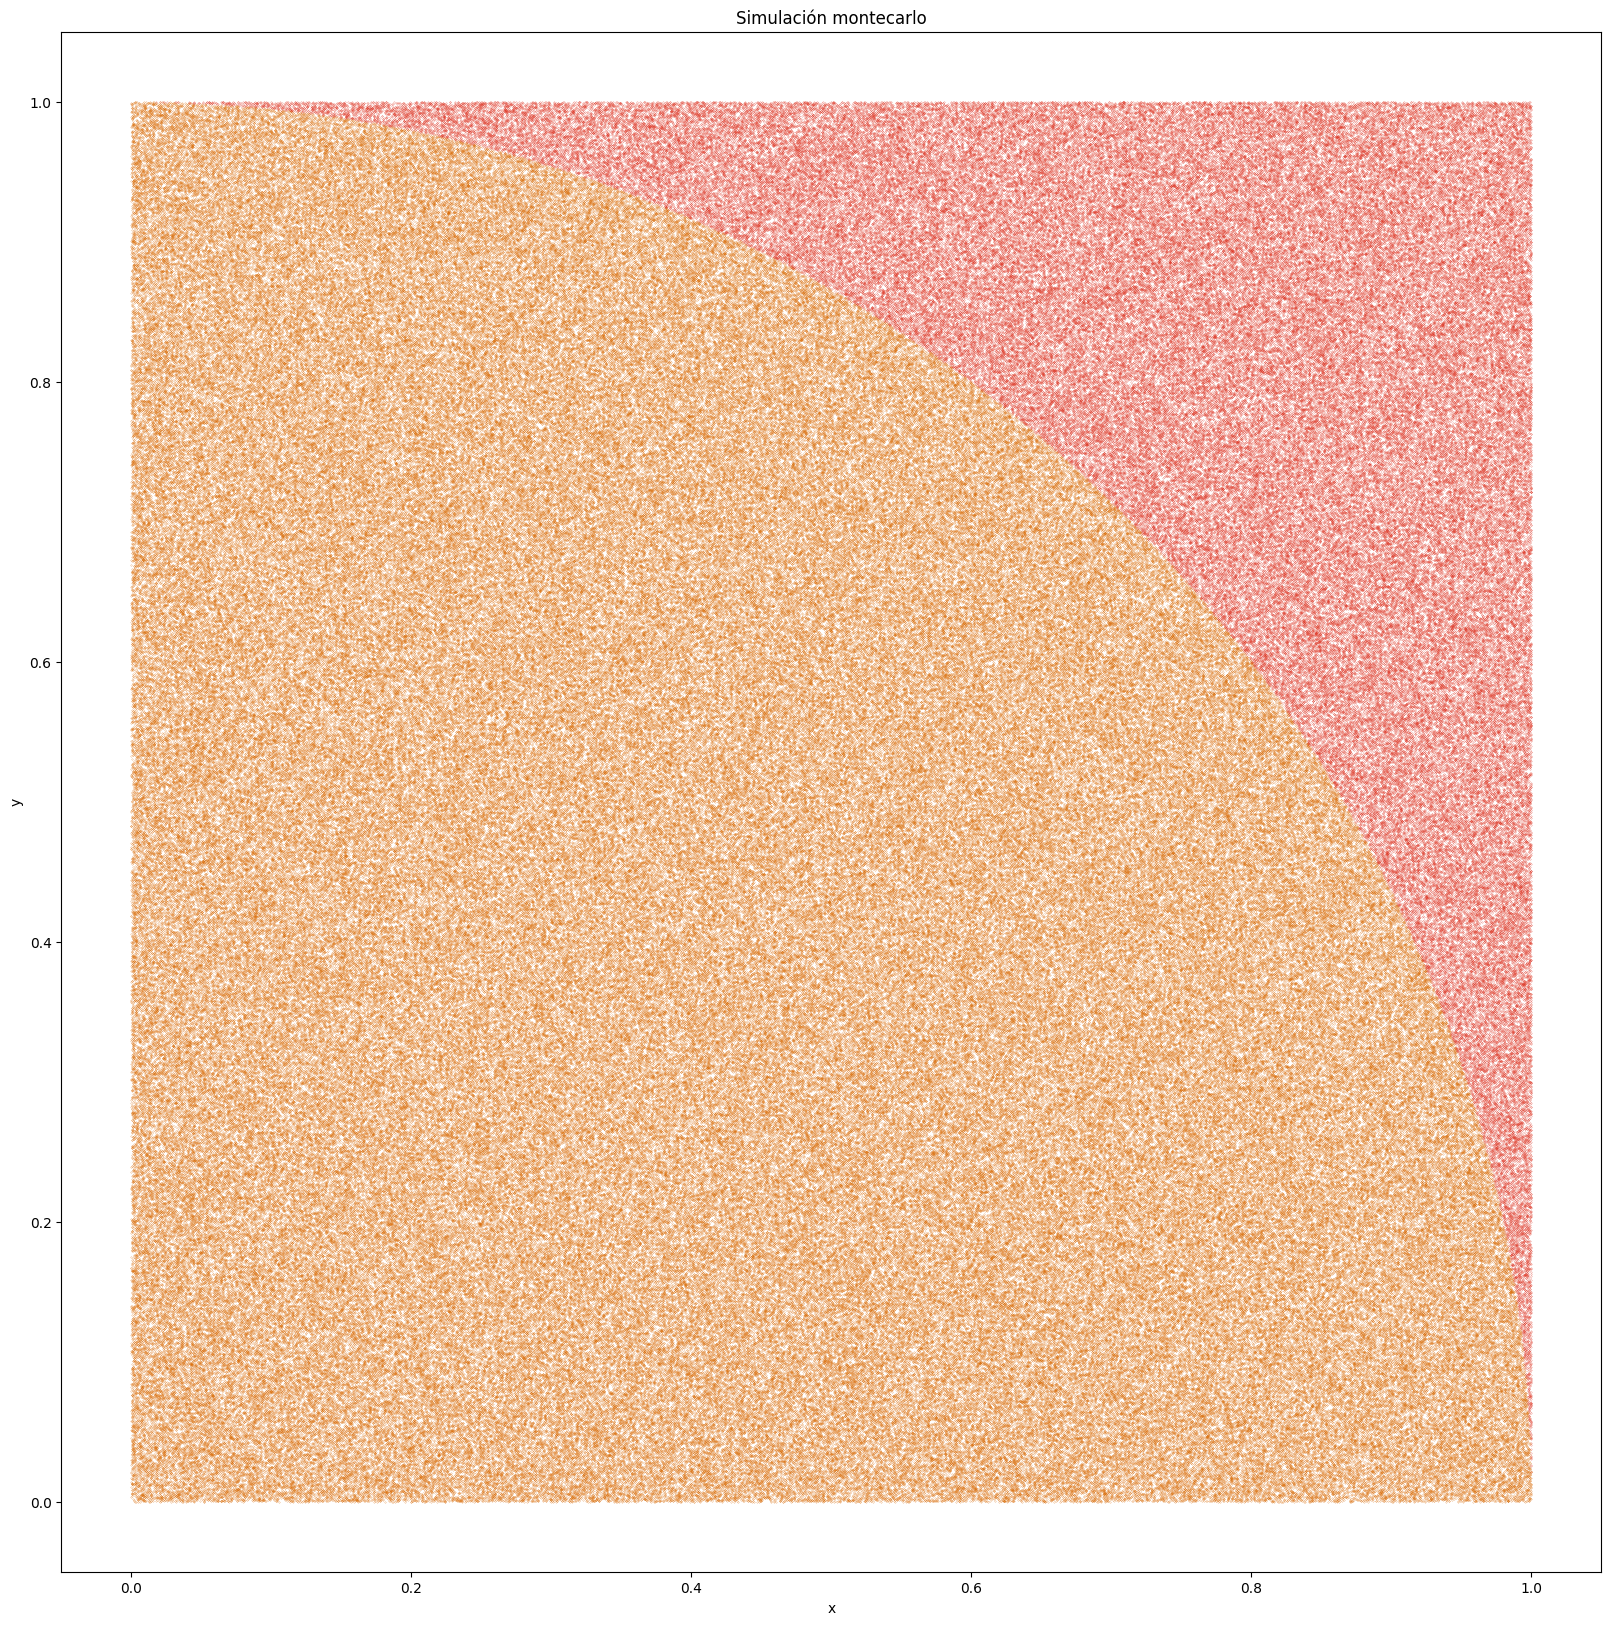

In [45]:
circ_plot(cl_inside,cl_outside,0.1)

3.1416186210565793


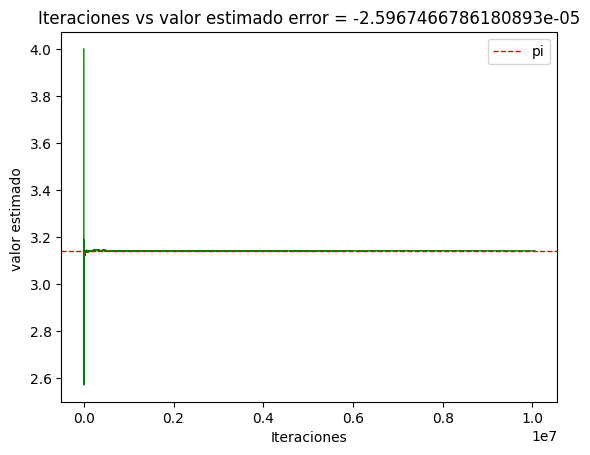

In [66]:
conv_plot(cl_pi_values)